The data file is serum and hearth metabolites in 6-10-16 week old fish.  
We want to identify the metabolites that significantly change in concentration with age.

In [2]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats

In [3]:
met_all = open('../data/Complete_raw_ht_serum.csv', 'rU').read() #this table contains all the metabolites identified by Jain's group in killifish serum and hearth in May 2016

In [4]:
met_all2 = met_all.split('\n')[:-1] #here I split the text file into many text files (strings) corresponding to the rows

In [5]:
met_all3 = [i.split(',') for i in met_all2]

In [10]:
class a9a(object):
    
    def __init__(self, inp, j):
        
        self.inp = inp    
        self.j = j
        
        self.H6 = [float(self.inp[self.j][i]) for i in range(1,5) ]
        self.H10 = [float(self.inp[self.j][i]) for i in range(5,9) ]
        self.H16 = [float(self.inp[self.j][i]) for i in range(9,13) ]
        self.S6 = [float(self.inp[self.j][i]) for i in range(13,17) ]
        self.S10 = [float(self.inp[self.j][i]) for i in range(17,21) ]
        self.S16 = [float(self.inp[self.j][i]) for i in range(21,25) ]    
            
        self.H_anv = scipy.stats.f_oneway(self.H6, self.H10, self.H16)
        self.S_anv = scipy.stats.f_oneway(self.S6, self.S10, self.S16)

In [65]:
def lp_h(inp):
    pval = []
    for j in range(1, len(inp)):
        ls = a9a(inp, j)
        pval.append(ls.H_anv[-1])
    return pval

def lp_s(inp):
    pval = []
    for j in range(1, len(inp)):
        ls = a9a(inp, j)
        pval.append(ls.S_anv[-1])
    return pval

In [66]:
pvals_h = lp_h(met_all3)
pvals_s = lp_s(met_all3)

In [67]:
pvals2_h = [i for i in pvals_h if str(i) != 'nan']
pvals2_s = [i for i in pvals_s if str(i) != 'nan']

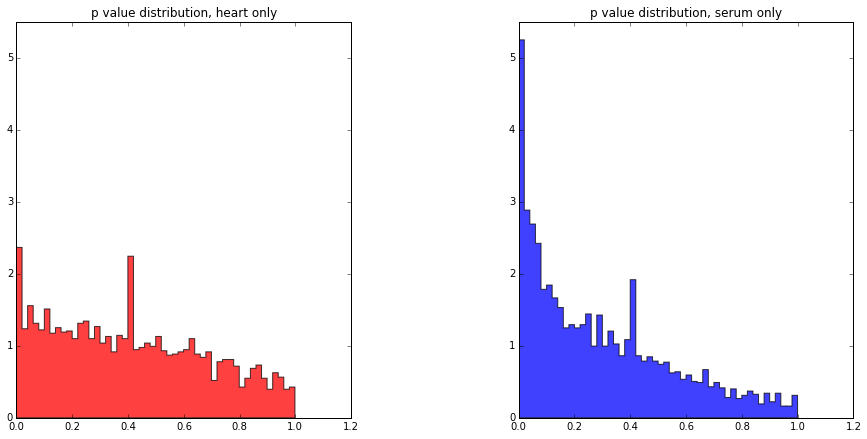

In [81]:
plt.figure(figsize=(15,4))

plt.subplot(1,2,1)
plt.subplots_adjust(top=1.5, hspace=0.8, wspace=0.5)
n, bins, patches = plt.hist(pvals2_h, 50, normed=1, facecolor='r', alpha=0.75, histtype='stepfilled') 
plt.xlim(0,1.2)
plt.ylim(0,5.5)
plt.title('p value distribution, heart only')

##

plt.subplot(1,2,2)
plt.subplots_adjust(top=1.5, hspace=0.8, wspace=0.5)
n, bins, patches = plt.hist(pvals2_s, 50, normed=1, facecolor='b', alpha=0.75, histtype='stepfilled') 
plt.xlim(0,1.2)
plt.ylim(0,5.5)
plt.title('p value distribution, serum only')

In [84]:
#!module load R
#!which R
#%load_ext rmagic

In [231]:
# Home-made Benjamini Hochberg q value estimate
def BH(pvals, fdr):
    sortedp = sorted(pvals)
    return max([sortedp[j] for j in range(len(pvals)) if float(j)/len(pvals)*fdr >= sortedp[j]])

In [208]:
qh_01 = BH(pvals2_h, 0.2) #FDR of 0.1
qh01_ind = [pvals_h.index(i) for i in pvals_h if i < qh_01]
prova = a9a(met_all3, qh01_ind[0]+1)
data = map(np.array, [prova.H6, prova.H10, prova.H16])

In [158]:
# plt.figure(figsize=(15,8))

# #plt.subplot(2,2,1)
# plt.boxplot(data) 
# plt.ylim(0,max([max(i)+0.1*max(i) for i in data ]))
# plt.title('FDR = 0.1, HEART')
# #plt.subplots_adjust(top=1.0, hspace=0.3, wspace=0.2)

# plt.xticks([1, 2, 3], ['6 weeks', '10 weeks', '16 weeks'])
# plt.ylabel('Abundance')

# for i in [1,2,3]:
#     y = data[i-1]
#     x = np.random.normal(i, 0.02, len(y))
#     plt.plot(x, y, 'r.', alpha=0.5)

In [220]:
def plotit(inp0, inp, fdr):
    q_fdr = BH(inp, fdr) #FDR of 0.1
    q_fdr_ind = [inp0.index(i) for i in inp0 if i < q_fdr]
    for k in range(len(q_fdr_ind)):
        data0 = a9a(met_all3, q_fdr_ind[k]+1) #the +1 is necessary, as the indexes of p_vals and met_all3 are shifted by 1
        data = map(np.array, [data0.H6, data0.H10, data0.H16])
        mass = met_all3[q_fdr_ind[k]+1][0] #this goes in the title
        
        plt.figure(figsize=(15,8))

        #plt.subplot(2,2,1)
        plt.boxplot(data) 
        plt.ylim(0,max([max(i)+0.1*max(i) for i in data ]))
        plt.title('FDR = 0.1, HEART, '+mass)
        #plt.subplots_adjust(top=1.0, hspace=0.3, wspace=0.2)

        plt.xticks([1, 2, 3], ['6 weeks', '10 weeks', '16 weeks'])
        plt.ylabel('Abundance')

        for i in [1,2,3]:
            y = data[i-1]
            x = np.random.normal(i, 0.02, len(y))
            plt.plot(x, y, 'r.', alpha=0.5)

In [221]:
#plotit(pvals_h, pvals2_h, 0.05)

In [239]:
def plotit2(inp0, inp, fdr, tissue):
    q_fdr = BH(inp, fdr) #FDR of 0.1
    q_fdr_ind = [inp0.index(i) for i in inp0 if i < q_fdr]
    for k in range(len(q_fdr_ind)):
        data0 = a9a(met_all3, q_fdr_ind[k]+1) #the +1 is necessary, as the indexes of p_vals and met_all3 are shifted by 1
        if tissue == 'h':
            data = map(np.array, [data0.H6, data0.H10, data0.H16])
        elif tissue == 's':
            data = map(np.array, [data0.S6, data0.S10, data0.S16])
        mass = met_all3[q_fdr_ind[k]+1][0] #this goes in the title
        
        plt.figure(figsize=(15,8))

        #plt.subplot(2,2,1)
        plt.boxplot(data) 
        plt.ylim(0,max([max(i)+0.1*max(i) for i in data ]))
        if tissue == 'h':
            plt.title('FDR = 0.1, HEART, '+mass)
        elif tissue == 's':
            plt.title('FDR = 0.1, SERUM, '+mass)
        #plt.subplots_adjust(top=1.0, hspace=0.3, wspace=0.2)

        plt.xticks([1, 2, 3], ['6 weeks', '10 weeks', '16 weeks'])
        plt.ylabel('Abundance')

        for i in [1,2,3]:
            y = data[i-1]
            x = np.random.normal(i, 0.02, len(y))
            plt.plot(x, y, 'r.', alpha=0.5)

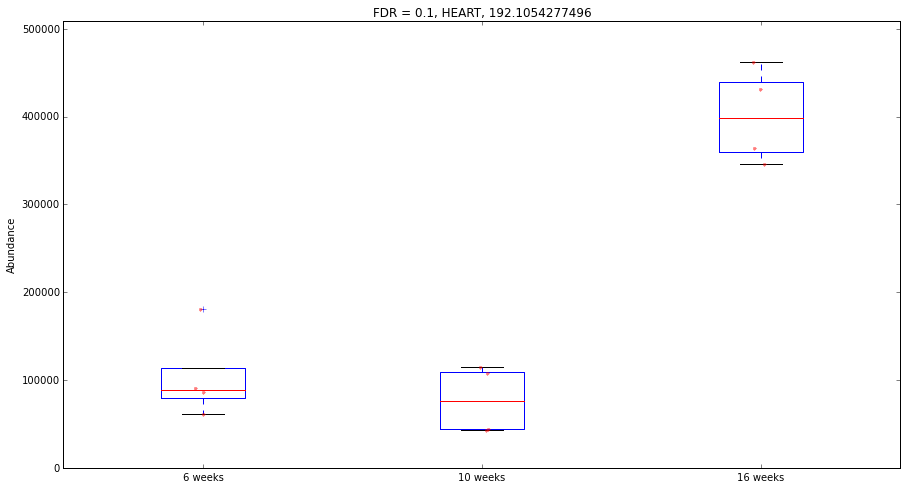

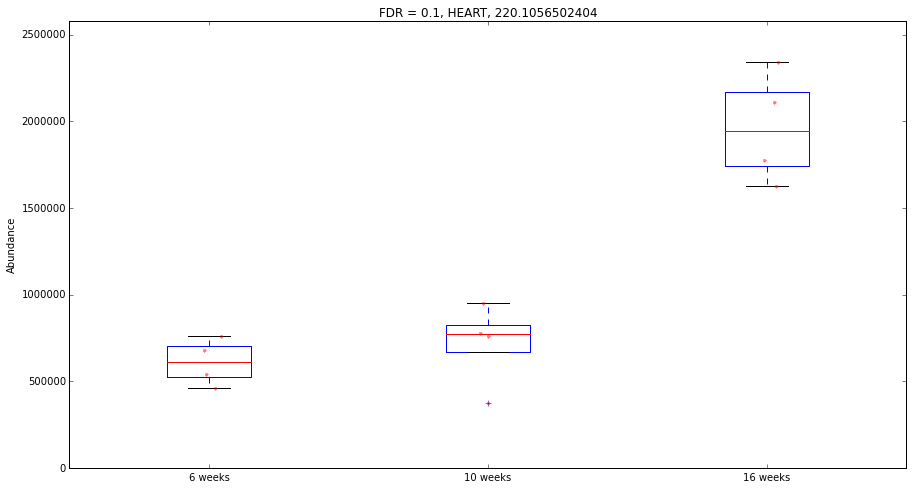

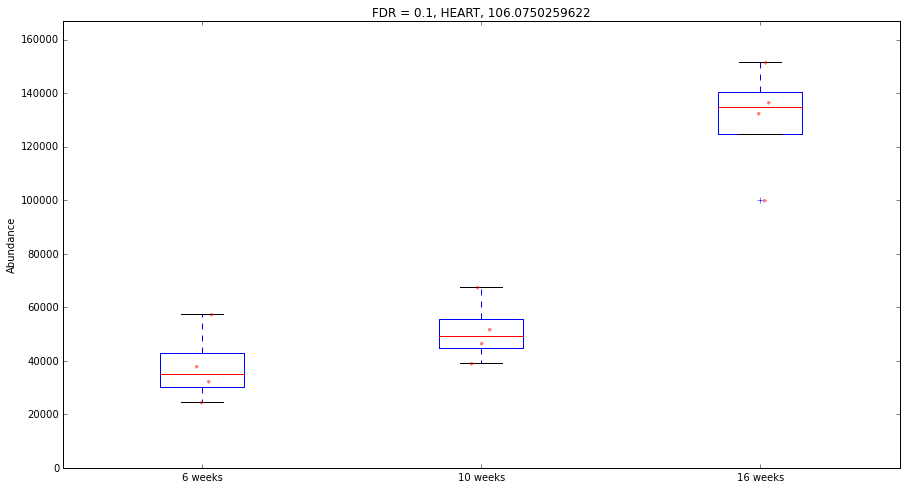

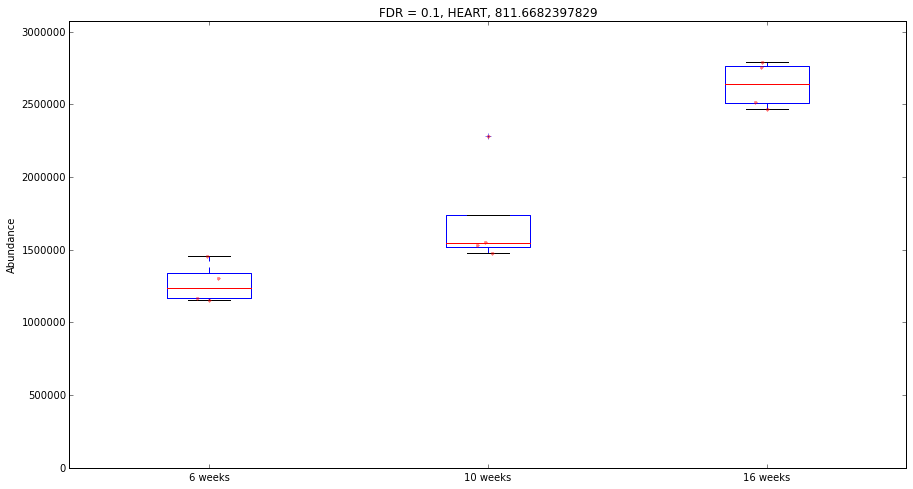

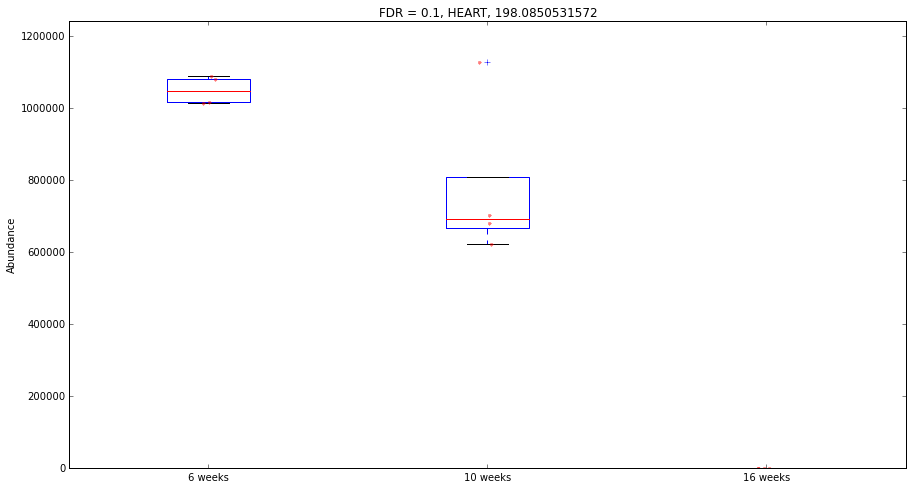

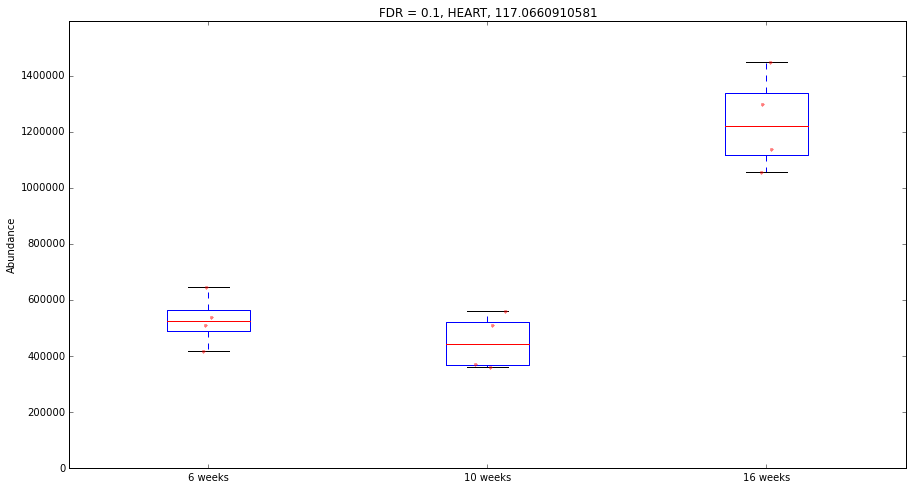

In [240]:
plotit2(pvals_h, pvals2_h, 0.1, 'h')